In [1]:
import pandas as pd
import numpy as np
import glob

In [34]:
## Video ID dictionary for records:

video_id = {
    0: '2e57b9_0_data',
    1: '08fd33_0_data',
    2: '573e61_0_data',
    3: '121364_0_data',
    4: 'obfacc_0_data'
}

In [157]:
# Dictionary to store DataFrames
data_frames = {}

# Path to the folder containing the .npy files
path = '121364_0_data/pitch_players_data_team_1_*.npy'

# List all .npy files matching the pattern
file_list = glob.glob(path)

# Iterate over the files and load them into the dictionary
for file in file_list:
    # Extract the key from the filename
    key = int(file.split('_')[-1].split('.')[0])
    #print(key)
    data = np.load(file)
    # Convert to pandas DataFrame
    df = pd.DataFrame(data, columns=['X', 'Y'])
    # Store in the dictionary
    data_frames[key] = df



In [158]:
data_frames = dict(sorted(data_frames.items()))

In [159]:
length = []
for key in data_frames.keys():
    length.append(len(data_frames[key]))

In [160]:
len(length)

750

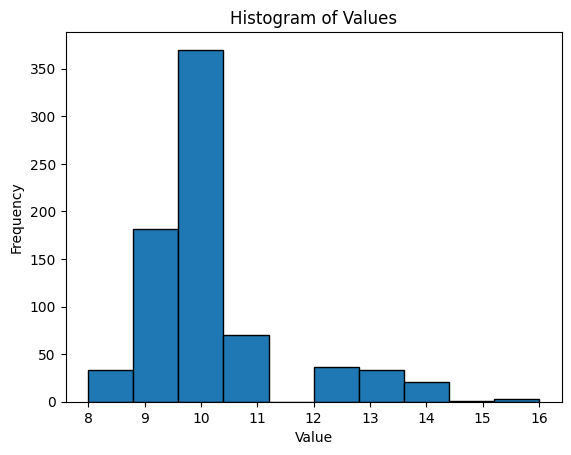

In [161]:
import matplotlib.pyplot as plt

plt.hist(length, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()


In [162]:
# Dictionary to store DataFrames
data_frames = {}

# Path to the folder containing the .npy files
path = '121364_0_data/pitch_players_data_team_1_*.npy'

# List all .npy files matching the pattern
file_list = glob.glob(path)

# Iterate over the files and load them into the dictionary
for file in file_list:
    # Extract the key from the filename
    key = int(file.split('_')[-1].split('.')[0])
    #print(key)
    data = np.load(file)
    # Convert to pandas DataFrame
    df = pd.DataFrame(data, columns=['X', 'Y'])
    # Store in the dictionary
    data_frames[key] = df
    
data_frames = dict(sorted(data_frames.items()))



In [163]:
lis = [key for key in data_frames.keys()]
id_set = [i for i in range(1,12)]

# Initialize 'ID' column for all DataFrames 
for key in lis: 
    data_frames[key]['ID'] = np.nan

first_key = lis[0]
data_frames[first_key]['ID'] = data_frames[first_key].index + 1

previous_df = data_frames[first_key]
used_ids = set(previous_df['ID'].tolist())

for key in lis[1:]:
    print(f"Previous df len: {len(previous_df)}")
    current_df = data_frames[key]
    print(f"Current Key: {key}")
    print(f"Current df len : {len(current_df)}")
    for i, row in previous_df.iterrows():
        distances = np.sqrt(((current_df['X'] - row['X']) * 105 / 12000) ** 2 + ((current_df['Y'] - row['Y']) * 68 / 7000) ** 2)
        if np.min(distances) < 0.5:
            closest_indices = np.argmin(distances)
            current_df.at[closest_indices, 'ID'] = row['ID']
            
    used_ids.update(current_df['ID'].dropna().tolist())
    possible_values = set(id_set) - set(used_ids)
    possible_values = sorted(possible_values)
            
    if current_df['ID'].isnull().any():
        for ind, r in current_df[current_df['ID'].isna()].iterrows():
            if possible_values:
                current_df.at[ind, 'ID'] = possible_values[0]
                used_ids.add(possible_values[0])
                possible_values = set(id_set) - set(used_ids)
                possible_values = sorted(possible_values)
            else:
                # Backtrack to earlier frames if possible_values is empty
                back_key_index = lis.index(key)
                while np.isnan(current_df.at[ind, 'ID']) and back_key_index > 0:
                    back_key_index -= 1
                    back_df = data_frames[lis[back_key_index]]
                    distances = np.sqrt(((back_df['X'] - r['X']) * 105 / 12000) ** 2 + ((back_df['Y'] - r['Y']) * 68 / 7000) ** 2)
                    if np.min(distances) < (key - lis[back_key_index]) * 0.5:
                        closest_indices = np.argmin(distances)
                        if not np.isnan(back_df.iloc[closest_indices]['ID']):
                            current_df.at[ind, 'ID'] = back_df.iloc[closest_indices]['ID']
                            
    previous_df = current_df        
    print("#############################")


        
        

Previous df len: 10
Current Key: 1
Current df len : 10
#############################
Previous df len: 10
Current Key: 2
Current df len : 10
#############################
Previous df len: 10
Current Key: 3
Current df len : 11
#############################
Previous df len: 11
Current Key: 4
Current df len : 10
#############################
Previous df len: 10
Current Key: 5
Current df len : 10
#############################
Previous df len: 10
Current Key: 6
Current df len : 11
#############################
Previous df len: 11
Current Key: 7
Current df len : 10
#############################
Previous df len: 10
Current Key: 8
Current df len : 11
#############################
Previous df len: 11
Current Key: 9
Current df len : 10
#############################
Previous df len: 10
Current Key: 10
Current df len : 10
#############################
Previous df len: 10
Current Key: 11
Current df len : 9
#############################
Previous df len: 9
Current Key: 12
Current df len : 11
#########

In [164]:
tt = {1,2}
for key in lis:
    df = data_frames[key]
    tt.update(df['ID'].tolist())
    

In [165]:
len(tt),tt

(15, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, nan, nan, nan, nan})

In [166]:
import numpy as np

# Create dictionaries to store x and y positions for each atom
positions = {i: {'t':[], 'x': [], 'y': []} for i in range(1, 12)}

# Iterate over the sorted dictionary to extract positions for each atom
for key in lis:
    df = data_frames[key]
    for atom_id in range(1, 12):
        filtered_df = df[df['ID'] == atom_id]
        positions[atom_id]['t'].append(key)
        if not filtered_df.empty:
            positions[atom_id]['x'].append(filtered_df['X'].values[0])
            positions[atom_id]['y'].append(filtered_df['Y'].values[0])
        else:
            positions[atom_id]['x'].append(np.nan)
            positions[atom_id]['y'].append(np.nan)




In [167]:
positions[11]

{'t': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,

In [168]:
for i in range(1,12):
    nan_count = np.isnan(positions[i]['x']).sum() 
    print(f"Number of NaN values in positions[{i}]['x']:", nan_count)

Number of NaN values in positions[1]['x']: 597
Number of NaN values in positions[2]['x']: 3
Number of NaN values in positions[3]['x']: 3
Number of NaN values in positions[4]['x']: 1
Number of NaN values in positions[5]['x']: 6
Number of NaN values in positions[6]['x']: 533
Number of NaN values in positions[7]['x']: 747
Number of NaN values in positions[8]['x']: 5
Number of NaN values in positions[9]['x']: 31
Number of NaN values in positions[10]['x']: 118
Number of NaN values in positions[11]['x']: 534


In [169]:
# Flatten the nested lists into rows and add player_id
flattened_rows = []
for key, sub_dict in positions.items():
    max_length = max(len(v) for v in sub_dict.values())
    for i in range(max_length):
        row = {'player_id': key}
        for sub_key, value in sub_dict.items():
            row[sub_key] = value[i] if i < len(value) else None
        flattened_rows.append(row)

# Create DataFrame
df = pd.DataFrame(flattened_rows)


In [170]:
## Set team id and video id

df['video_id'] = 3
df['team_id'] = 1

In [171]:
df['player_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [172]:
df[df['player_id']==1]

,player_id,t,x,y,video_id,team_id
0,1,0,6624.083984,3250.403809,3,1
1,1,1,6622.048828,3250.775635,3,1
2,1,2,6650.877441,3262.461426,3,1
3,1,3,6667.255859,3287.596191,3,1
4,1,4,6677.402832,3286.031250,3,1
...,...,...,...,...,...,...
745,1,745,NaN,NaN,3,1
746,1,746,NaN,NaN,3,1
747,1,747,NaN,NaN,3,1
748,1,748,NaN,NaN,3,1


In [173]:
df.to_parquet(f"lstm_data/video_3_team_1.parquet")

750


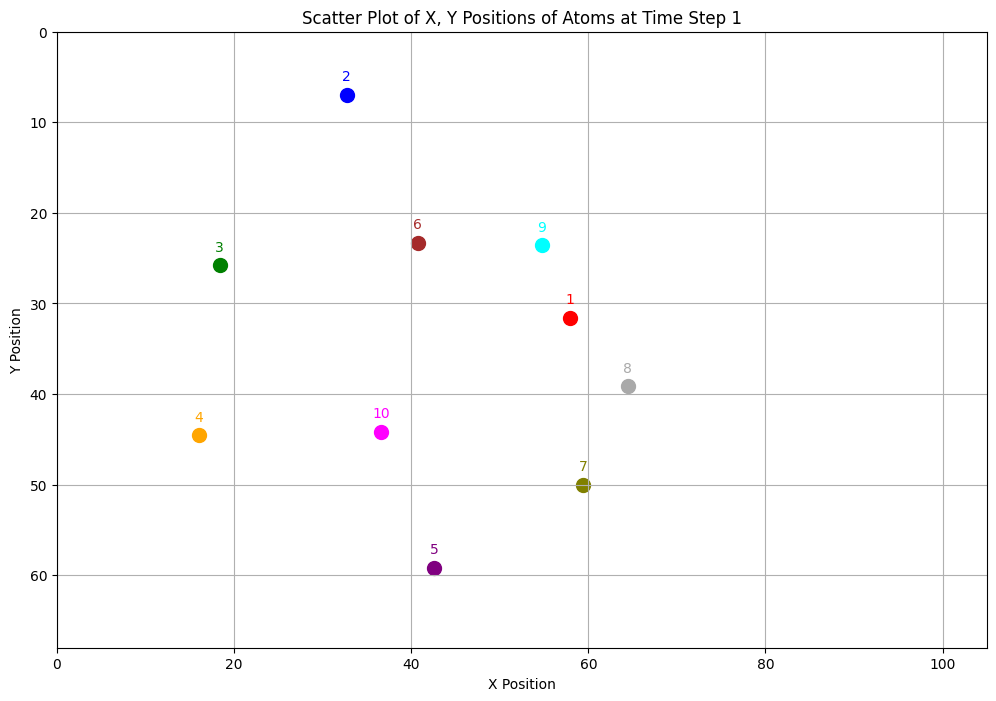

In [174]:
import matplotlib.pyplot as plt

# Number of time steps (assuming all sequences are of the same length)
num_time_steps = len(positions[1]['t'])
print(num_time_steps)

# Define a color map for each atom_id
color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'olive',
    8: 'darkgray',
    9: 'cyan',
    10: 'magenta',
    11: 'darkgreen',
    12: 'black'
}

# Create plots for each time step
for t in range(num_time_steps+100):
    plt.figure(figsize=(12, 8))
    for atom_id in range(1,12):
        x_pos = positions[atom_id]['x'][t]
        y_pos = positions[atom_id]['y'][t]
        if not np.isnan(x_pos) and not np.isnan(y_pos):
            color = color_map.get(atom_id, 'black')  # Default to black if atom_id not in color_map
            plt.scatter(x_pos * 105 / 12000, y_pos * 68 / 7000, s=100, color=color, label=f'Atom ID {atom_id}')
            plt.annotate(f'{atom_id}', (x_pos * 105 / 12000, y_pos * 68 / 7000), textcoords="offset points", xytext=(0, 10), ha='center', color=color)
    plt.title(f'Scatter Plot of X, Y Positions of Atoms at Time Step {t + 1}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    #plt.legend()
    plt.grid(True)
    plt.xlim(0, 105)
    plt.ylim(68, 0)
    plt.show()
    break



# Video

In [292]:
import matplotlib.pyplot as plt
import os
import numpy as np
selected_list = [1,2,3,4,5,7,8,10]
# Create a target folder for the images
target_folder = 'plots-obfacc'
os.makedirs(target_folder, exist_ok=True)

# Define a color map for each atom_id
color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'olive',
    8: 'darkgray',
    9: 'cyan',
    10: 'magenta',
    11: 'darkgreen'
}

# Number of time steps (assuming all sequences are of the same length)
num_time_steps = len(next(iter(positions.values()))['t'])

# Create plots for each time step
for t in range(num_time_steps):
    plt.figure(figsize=(12, 8))
    for atom_id in selected_list:
        x_pos = positions[atom_id]['x'][t]
        y_pos = positions[atom_id]['y'][t]
        if not np.isnan(x_pos) and not np.isnan(y_pos):
            color = color_map.get(atom_id, 'black')  # Default to black if atom_id not in color_map
            plt.scatter(x_pos * 105 / 12000, y_pos * 68 / 7000, s=100, color=color, label=f'Atom ID {atom_id}')
            plt.annotate(f'{atom_id}', (x_pos * 105 / 12000, y_pos * 68 / 7000), textcoords="offset points", xytext=(0, 10), ha='center', color=color)
    plt.title(f'Scatter Plot of X, Y Positions of Atoms at Time Step {t + 1}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    #plt.legend()
    plt.grid(True)
    plt.xlim(0, 105)
    plt.ylim(68, 0)
    plt.savefig(os.path.join(target_folder, f'plot_{t + 1}.png'))
    plt.close()


In [293]:
import cv2
import os

# Set the path to the folder containing the images
image_folder = "./plots-obfacc"
# Set the name and path for the output video file
video_name = 'id_video_test_full.mp4'

# Get a list of all files in the image folder
images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]



# Sort the images by name, especially to handle the numerical order
images.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Read the first image to get the size
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 25, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

# Release the VideoWriter
video.release()

print(f'Video saved as {video_name}')

Video saved as id_video_test_full.mp4


# Distance Histogram

In [171]:
previous_df = data_frames[first_key]
d = []

for key in lis[1:]:
    print(f"Length of Previous df: {len(previous_df)}")
    print(f"Current key:{key}")
    current_df = data_frames[key]
    print(f"Length of Current df: {len(current_df)}")
    ids = []
    used_ids = set()
    id_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    if len(current_df) > len(previous_df):
        for i, row in previous_df.iterrows():
            distances = np.sqrt(((current_df['X'] - row['X']) * 105 / 12000) ** 2 + ((current_df['Y'] - row['Y']) * 68 / 7000) ** 2)
            d.append(np.min(distances))
                     
    else:
        for i, row in previous_df.iterrows():
            distances = np.sqrt(((current_df['X'] - row['X']) * 105 / 12000) ** 2 + ((current_df['Y'] - row['Y']) * 68 / 7000) ** 2)
            d.append(np.min(distances))

            
    previous_df = current_df

            
    

Length of Previous df: 9
Current key:1
Length of Current df: 9
Length of Previous df: 9
Current key:2
Length of Current df: 9
Length of Previous df: 9
Current key:3
Length of Current df: 9
Length of Previous df: 9
Current key:4
Length of Current df: 9
Length of Previous df: 9
Current key:5
Length of Current df: 9
Length of Previous df: 9
Current key:6
Length of Current df: 9
Length of Previous df: 9
Current key:7
Length of Current df: 9
Length of Previous df: 9
Current key:8
Length of Current df: 8
Length of Previous df: 8
Current key:9
Length of Current df: 9
Length of Previous df: 9
Current key:10
Length of Current df: 9
Length of Previous df: 9
Current key:11
Length of Current df: 9
Length of Previous df: 9
Current key:12
Length of Current df: 9
Length of Previous df: 9
Current key:13
Length of Current df: 9
Length of Previous df: 9
Current key:14
Length of Current df: 9
Length of Previous df: 9
Current key:15
Length of Current df: 8
Length of Previous df: 8
Current key:16
Length of

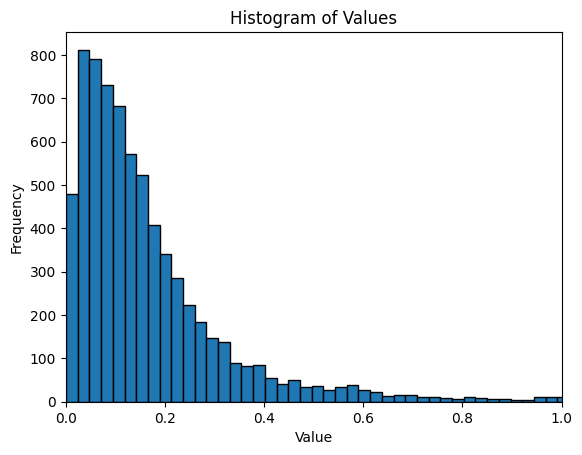

In [179]:
plt.hist(d, bins=1000, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.xlim(0,1)
plt.show()
